Mapa Auto-organizável 4 x 4 Matriz U:
[[0.00368199 0.00652708 0.0055702  0.00316407]
 [0.00462754 0.00576754 0.00629575 0.00516265]
 [0.00718201 0.00539922 0.00628705 0.00623418]
 [0.00735103 0.00693433 0.00563715 0.003379  ]]


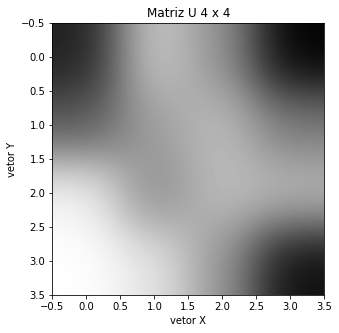

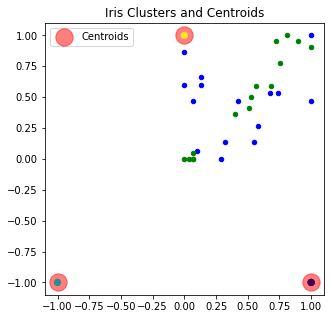

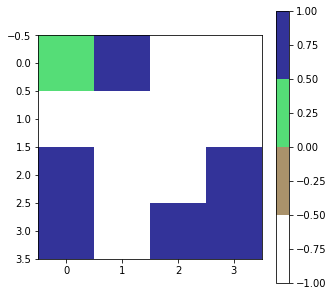

Mapa Auto-organizável 6 x 6 Matriz U:
[[0.00492829 0.00557523 0.00499154 0.00428887 0.00578289 0.00733064]
 [0.00651822 0.00670387 0.00647793 0.00550092 0.00690512 0.00831837]
 [0.00748234 0.0065617  0.00530142 0.00508944 0.00614714 0.00664316]
 [0.00791647 0.00649274 0.00591997 0.00639292 0.00513135 0.00533919]
 [0.00822945 0.00738639 0.00789259 0.00734242 0.00559555 0.00657809]
 [0.00916337 0.00735117 0.00707183 0.00716261 0.00677164 0.00819899]]


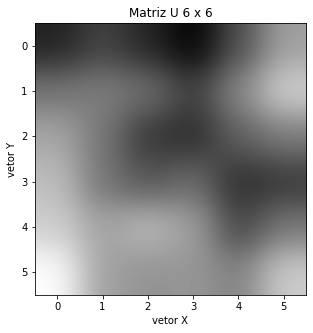

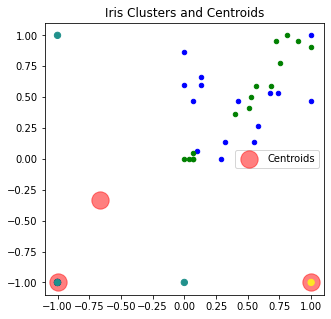

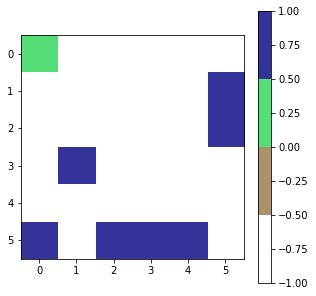

Mapa Auto-organizável 8 x 8 Matriz U:
[[0.00601276 0.00594295 0.0046408  0.00555349 0.0051223  0.00648031
  0.00663625 0.00584136]
 [0.00679718 0.00647178 0.00627488 0.00798804 0.00676534 0.00710395
  0.00609358 0.00471527]
 [0.00752012 0.00705178 0.00809778 0.00677466 0.00626735 0.00684731
  0.00602666 0.00513061]
 [0.00809832 0.00658689 0.00781866 0.0067466  0.0066644  0.00882347
  0.00848185 0.00697188]
 [0.00568473 0.00571243 0.0062088  0.00670984 0.00603572 0.00655354
  0.00509196 0.00708091]
 [0.00432922 0.00625761 0.00508602 0.00401203 0.00580961 0.00720603
  0.00622384 0.00703964]
 [0.00530761 0.00736399 0.00566763 0.00425666 0.00752971 0.00763556
  0.00894606 0.00767009]
 [0.00430745 0.00595902 0.00503936 0.0053187  0.00640742 0.00556956
  0.00690535 0.00567178]]


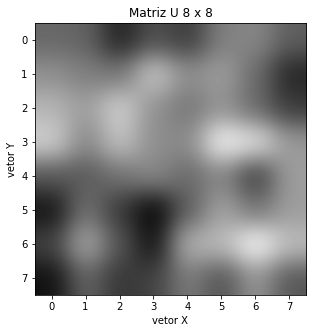

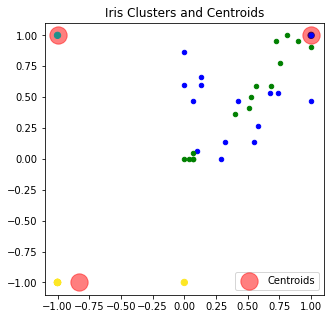

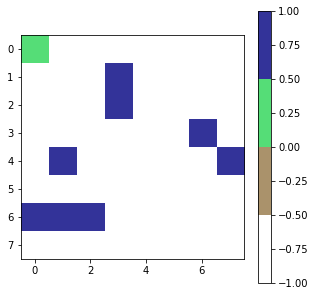

In [ ]:
# ==================================================================
# Universidade Estadual de Feira de Santana
# Mestrado em Ciência da Computação
# Disciplina: PGCC015 - Inteligência Computacional
# Professor: Matheus Giovanni Pires
# Aluno: Noberto Pires Maciel
# EPC04 - 23/10/2020
# ==================================================================
 
import numpy as np
import matplotlib.pyplot as plt
import time
 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
 
def closest_node(data, t, map, m_rows, m_cols, raio):
  result = (0,0)
  for i in range(m_rows):
    for j in range(m_cols):
      ed = euc_dist(map[i][j], data[t])
      if ed < raio:
        raio = ed
        result = (i, j)
  return result
 
def euc_dist(v1, v2):
  return np.linalg.norm(v1 - v2)
 
def most_common(lst, n):
  if len(lst) == 0: return -1
  counts = np.zeros(shape=n, dtype=np.int)
  for i in range(len(lst)):
    counts[lst[i]] += 1
  return np.argmax(counts)
 
def main(Rows,Cols,LearnMax,StepsMax,normalize, k_means, raio):
  RangeMax = Rows + Cols
  np.random.seed(1)
  Dim = 4
 
  # 1. carregar dados
  data_file = "https://raw.githubusercontent.com/PGCC-Uefs/PGCC015/master/EPC04/datasets/iris.txt"
  data_x = np.loadtxt(data_file, delimiter=",", usecols=range(0,4), dtype=np.float64)
  data_y = np.loadtxt(data_file, delimiter=",", usecols=[4], dtype=np.int)
 
  data_file_test = "https://raw.githubusercontent.com/PGCC-Uefs/PGCC015/master/EPC04/datasets/iris_tst2.txt"
  data_x_test = np.loadtxt(data_file_test, delimiter=",", usecols=range(0,4), dtype=np.float64)
  scalertest = MinMaxScaler().fit(data_x_test);
  data_x_test = scalertest.transform(data_x_test);
 
  # 1.1. normalização
  if normalize:
    scaler = MinMaxScaler().fit(data_x);
    data_x = scaler.transform(data_x);
 
  # 2. construção do SOM
  print("Mapa Auto-organizável %s x %s"%(Rows,Cols)+" Matriz U:")
  map = np.random.random_sample(size=(Rows,Cols,Dim))
  for s in range(StepsMax):
    #if s % (StepsMax/5) == 0: print("step: ", str(s))
    restante = 1.0 - ((s * 1.0) / StepsMax)
    curr_range = (int)(restante * RangeMax)
    curr_rate = restante * LearnMax
 
    t = np.random.randint(len(data_x))
    (bmu_row, bmu_col) = closest_node(data_x, t, map, Rows, Cols, raio)
    for i in range(Rows):
      for j in range(Cols):
        if euc_dist(bmu_row, bmu_col) < curr_range:
          map[i][j] = map[i][j] + curr_rate * (data_x[t] - map[i][j])
  
  # 3. construção da Matriz U
  u_matrix = np.zeros(shape=(Rows,Cols), dtype=np.float64)
  for i in range(Rows):
    for j in range(Cols):
      v = map[i][j]  # a vector 
      sum_dists = 0.0; ct = 0     
      if i-1 >= 0:    # above
        sum_dists += euc_dist(v, map[i-1][j]); ct += 1
      if i+1 <= Rows-1:   # below
        sum_dists += euc_dist(v, map[i+1][j]); ct += 1
      if j-1 >= 0:   # left
        sum_dists += euc_dist(v, map[i][j-1]); ct += 1
      if j+1 <= Cols-1:   # right
        sum_dists += euc_dist(v, map[i][j+1]); ct += 1
      
      u_matrix[i][j] = sum_dists / ct
 
  # configura o tamanho do gráfico
  plt.rcParams['figure.figsize'] = (5,5)
 
  # exibir Matriz U
  print(u_matrix)
  plt.imshow(u_matrix, cmap='gray', interpolation='gaussian')  # black = close = clusters
  plt.title('Matriz U %s x %s'%(Rows,Cols))
  plt.xlabel('vetor X')
  plt.ylabel('vetor Y')
  plt.show()
 
  # associa as classes aos node-maps
  mapping = np.empty(shape=(Rows,Cols), dtype=object)
  for i in range(Rows):
    for j in range(Cols):
      mapping[i][j] = []
 
  for t in range(len(data_x)):
    (m_row, m_col) = closest_node(data_x, t, map, Rows, Cols, raio)
    mapping[m_row][m_col].append(data_y[t])
  
 
  classes = np.zeros(shape=(Rows,Cols), dtype=np.int)  
  for i in range(Rows):
    for j in range(Cols):
      classes[i][j] = most_common(mapping[i][j], 3)
 
  # roda o algoritmo k-means
  if k_means == True:
    kmeans = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 300)
    kmeans.fit(classes)
    kmeans.cluster_centers_
    kmeans.predict(classes)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'red',label = 'Centroids', alpha=0.5,)
    plt.scatter(classes[:,0], classes[:,1], s = 40, c = kmeans.labels_)
    plt.scatter(data_x_test[:,0], data_x_test[:,1], s = 20, c ='b')
    plt.scatter(data_x_test[:,2], data_x_test[:,3], s = 20, c ='g')
    plt.title('Iris Clusters and Centroids')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()
    plt.show()
 
    plt.imshow (classes, cmap = plt.cm.get_cmap ('terrain_r', 4))
    plt.colorbar ()
    plt.show()
# ==================================================================
if __name__=="__main__":
  #main(Rows,Cols,Dim,LearnMax,StepsMax,normalize,k_means,raio)
  main(4,4,0.001,10000,False,True,1)
  main(6,6,0.001,10000,False,False,1)
  main(8,8,0.001,10000,False,False,1)

Tempo de treinamento: 32.3123242855072 
Número de Épocas: 500 



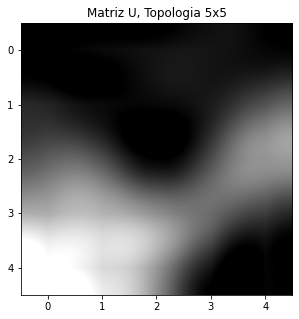

Classe dos Neurônios:
 [[2 2 2 1 1]
 [2 2 2 1 1]
 [2 2 2 2 2]
 [1 1 2 0 0]
 [0 1 0 0 0]] 

Centróides:
 [[0.26796832 0.65834201 0.13600859 0.10666174]
 [0.69913845 0.57051228 0.73985163 0.76987422]
 [0.48725067 0.36017806 0.55394394 0.52240206]] 

Agrupamento das amostras:
 [0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1] 

Amostras na classe 0:
 [0, 1, 2, 3, 4] 

Amostras na classe 1:
 [10, 11, 12, 13, 14] 

Amostras na classe 2:
 [5, 6, 7, 8, 9] 



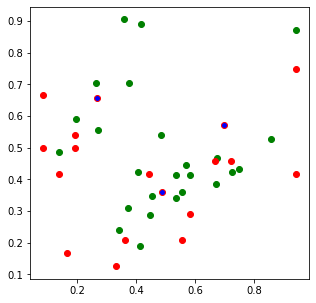

Tempo de treinamento: 76.8618495464325 
Número de Épocas: 500 



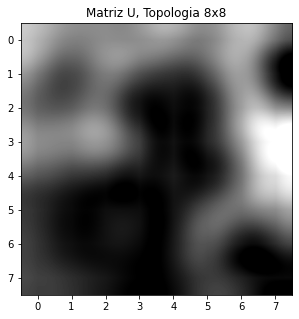

Classe dos Neurônios:
 [[0 2 0 2 2 1 2 0]
 [2 2 2 1 1 1 0 0]
 [2 2 1 1 1 1 2 0]
 [1 2 1 1 1 1 2 0]
 [1 1 1 1 1 1 2 2]
 [1 1 1 2 2 2 0 0]
 [2 2 2 2 2 0 0 0]
 [2 2 2 2 2 0 0 0]] 

Centróides:
 [[0.29348644 0.62917548 0.16900562 0.19124425]
 [0.65073687 0.41771803 0.72500391 0.70946022]
 [0.37927833 0.33960951 0.5278581  0.53621493]] 

Agrupamento das amostras:
 [0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1] 

Amostras na classe 0:
 [0, 1, 2, 3, 4] 

Amostras na classe 1:
 [10, 11, 12, 13, 14] 

Amostras na classe 2:
 [5, 6, 7, 8, 9] 



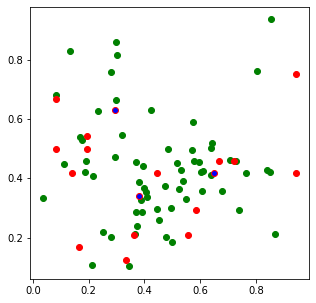

Tempo de treinamento: 261.51940274238586 
Número de Épocas: 500 



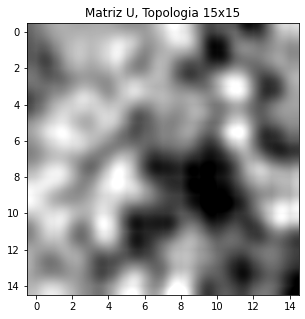

Classe dos Neurônios:
 [[1 2 2 0 1 0 2 0 2 1 1 0 1 1 0]
 [1 1 1 0 2 1 2 2 0 1 1 1 0 0 1]
 [0 1 0 0 1 2 1 0 2 0 1 1 0 0 1]
 [0 1 1 2 2 2 0 1 0 0 1 0 0 0 2]
 [0 0 0 1 0 0 1 2 1 2 1 2 2 2 1]
 [1 2 2 1 2 0 1 1 1 2 1 1 2 0 0]
 [2 0 0 1 1 1 1 1 0 0 0 0 0 1 1]
 [1 1 1 0 1 0 0 0 0 0 0 0 1 0 1]
 [2 0 1 0 0 1 0 0 0 0 0 1 0 2 0]
 [1 2 2 2 1 1 1 0 1 0 0 0 0 0 1]
 [2 1 1 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 1 1 2 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 2 2 1 1 1 2 0]
 [1 1 1 0 1 2 0 1 0 2 1 1 1 1 0]
 [0 0 2 2 1 0 2 2 1 0 0 1 1 0 0]] 

Centróides:
 [[0.52833963 0.47306506 0.53008502 0.70178373]
 [0.34777665 0.59168216 0.35894445 0.30026992]
 [0.78503958 0.37841797 0.70455918 0.23282854]] 

Agrupamento das amostras:
 [0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1] 

Amostras na classe 0:
 [5, 7, 9, 10, 11, 12, 13, 14] 

Amostras na classe 1:
 [0, 1, 2, 3, 4, 6, 8] 

Amostras na classe 2:
 [] 



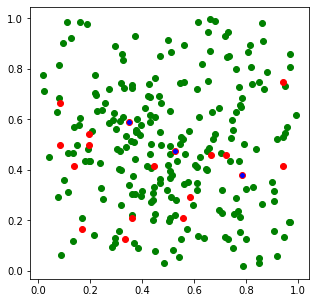

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import time
from sklearn.cluster import KMeans

def generate_empty_matrix(rows, cols):
  matrix = [];
  for i in range(rows):
    line = [];
    for j in range(cols):
      line.append(np.zeros(1)[0]);
    matrix.append(line);
  return matrix;

def generate_weights(rows, cols, inputs):
  matrix = [];
  for i in range(rows):
    neuroniuns = [];
    for j in range(cols):
      weights = [];
      for k in range(inputs):
        weights.append(np.random.rand(1)[0]);
      neuroniuns.append(weights);
    matrix.append(neuroniuns);
  return matrix;

def euclidian(input, weights):
  dists = np.array(generate_empty_matrix(weights.shape[0], weights.shape[1]))

  for j in range(weights.shape[0]):
    for k in range(weights.shape[1]):
      for l in range(weights.shape[2]):
        dists[j][k] += np.power((input[l] - weights[j][k][l]), 2);
  dists = np.sqrt(dists);
  return dists


"""Geração da Matriz de Vizinhança"""
def generate_neighborhood(rows, cols):
  neighborhood = [];
  for i in range(rows):
    for j in range(cols):
      neighbors = [];
      if (i > 0) and (i < rows - 1) and (j > 0) and (j < cols - 1):
        neighbors.append({"x": i, "y": j + 1});
        neighbors.append({"x": i + 1, "y": j});
        neighbors.append({"x": i, "y": j - 1});
        neighbors.append({"x": i - 1, "y": j});
      else:
        if (i == 0):
          if (j == 0):
            neighbors.append({"x": i, "y": j + 1});
            neighbors.append({"x": i + 1, "y": j});
          elif (j == (cols - 1)):
            neighbors.append({"x": i, "y": j - 1});
            neighbors.append({"x": i + 1, "y": j});
          elif (j > 0) and (j < cols - 1):
            neighbors.append({"x": i, "y": j - 1});
            neighbors.append({"x": i, "y": j + 1});
            neighbors.append({"x": i + 1, "y": j});
        elif (i == rows - 1):
          if (j == 0):
            neighbors.append({"x": i - 1, "y": j});
            neighbors.append({"x": i, "y": j + 1});
          elif (j == (cols - 1)):
            neighbors.append({"x": i - 1, "y": j});
            neighbors.append({"x": i, "y": j - 1});
          elif (j > 0) and (j < cols - 1):
            neighbors.append({"x": i, "y": j - 1});
            neighbors.append({"x": i, "y": j + 1});
            neighbors.append({"x": i - 1, "y": j});
        if (j == 0):
          if (i > 0) and (i < cols - 1):
            neighbors.append({"x": i - 1, "y": j});
            neighbors.append({"x": i, "y": j + 1});
            neighbors.append({"x": i + 1, "y": j});
        elif (j == cols -1):
          if (i > 0) and (i < cols - 1):
            neighbors.append({"x": i - 1, "y": j});
            neighbors.append({"x": i, "y": j - 1});
            neighbors.append({"x": i + 1, "y": j});
      neighborhood.append(neighbors);
  return neighborhood;

"""Processamento dos dados"""

i = 9;

train_data = pd.read_csv('https://raw.githubusercontent.com/Joacy/pgcc015-inteligencia-computacional/master/epc/epc03/iris-plants/iris-10-'+ str(i + 1) +'tra.txt', sep=',');
test_data = pd.read_csv('https://raw.githubusercontent.com/Joacy/pgcc015-inteligencia-computacional/master/epc/epc03/iris-plants/iris-10-'+ str(i + 1) +'tst.txt', sep=',');

# Separando entradas e saídas para o treinamento
x_train = train_data.iloc[:,0:4];
y_train_text = train_data.iloc[:,4:5];

# Separando entradas e saídas para o teste
x_test = test_data.iloc[:,0:4];
y_test_text = test_data.iloc[:,4:5];

# Normalização dos dados
scaler = MinMaxScaler().fit(x_train);

# Normalizando dados do treinamento
x_train = scaler.transform(x_train);

# Normalizando dados do teste
x_test = scaler.transform(x_test);

"""Algoritmo SOM"""

def som(map_rows, map_cols, training_data, learning_rate, iterations):
  # Definindo mapa topológico
  map = np.array(generate_empty_matrix(map_rows, map_cols));

  # Montar os conjuntos de vizinhança
  neighborhood = np.array(generate_neighborhood(map.shape[0], map.shape[1])).reshape(map.shape[0], map.shape[1]);

  # Inicializar w aleatoriamente;
  weights = np.array(generate_weights(map.shape[0], map.shape[1], training_data.shape[1]));

  # Inicializar a taxa de aprendizado;
  eta = learning_rate;
  
  winners_current = []
  winners_prev = [[99999, 99999]]

  epochs = 0;

  while True and (epochs < iterations):
    winners_prev = winners_current.copy();

    for i in range(training_data.shape[0]):
      # Cálculo da distância euclidiana
      map = euclidian(training_data[i], weights);
      
      # Encontrando neurônio vencedor
      min_x = 0;
      min_y = 0;
      min = 999999;
      for j in range(map.shape[0]):
        for k in range(map.shape[1]):
          if(min > map[j][k]):
            min_x = j;
            min_y = k;
            min = map[j][k];
      
      winner = []
      winner.append(min_x)
      winner.append(min_y)
      winners_current.append(winner)

      # Atualização dos pesos do neurônio vencedor
      weights[min_x][min_y] = weights[min_x][min_y] + eta * (training_data[i] - weights[min_x][min_y])
      
      # Atualização dos pesos dos vizinhos do neurônio vencedor
      for neighbor in range(len(neighborhood[min_x][min_y])):
        weights[neighborhood[min_x][min_y][neighbor]['x']][neighborhood[min_x][min_y][neighbor]['y']] = weights[neighborhood[min_x][min_y][neighbor]['x']][neighborhood[min_x][min_y][neighbor]['y']] + 0.5 * eta * (training_data[i] - weights[neighborhood[min_x][min_y][neighbor]['x']][neighborhood[min_x][min_y][neighbor]['y']])

    min_x_current = min_x
    min_y_current = min_y
    epochs = epochs + 1
    
    if (epochs % 5000) == 0:
      print(epochs)

    if (winners_current == winners_prev):
      break

  return weights, neighborhood, epochs

"""Encontrando a Matriz-U"""

def u_matrix(weights, neighborhood):
  matrixU = np.array(generate_empty_matrix(weights.shape[0], weights.shape[1]))
  for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
      for neighbor in range(len(neighborhood[i][j])):
        matrixU[i][j] += np.sqrt(sum(np.power((weights[i][j] - weights[neighborhood[i][j][neighbor]['x']][neighborhood[i][j][neighbor]['y']]), 2)))
      matrixU[i][j] = matrixU[i][j] / len(neighborhood[i][j])
  return matrixU

"""Aplicação do Kmeans"""

def class_neuroniun(weights, clusters):
  a = []
  for j in range(weights.shape[0]):
    for k in range(weights.shape[1]):
      a.append(weights[j][k])

  kmeans = KMeans(n_clusters = clusters, init = 'random').fit(a)
  
  weights_classes = np.array(kmeans.labels_)
  weights_classes = weights_classes.reshape(weights.shape[0], weights.shape[1])
  
  centroids = np.array(kmeans.cluster_centers_)

  return weights_classes, centroids

"""Classificação das entradas"""

def predict_classes(x, centroids):
  class_0 = []
  class_1 = []
  class_2 = []

  predict = []

  for i in range(x.shape[0]):
    d0 = np.power((x[i] - centroids[0]), 2)
    d1 = np.power((x[i] - centroids[1]), 2)
    d2 = np.power((x[i] - centroids[2]), 2)

    d0 = np.sqrt(sum(d0))
    d1 = np.sqrt(sum(d1))
    d2 = np.sqrt(sum(d2))

    if d0 < d1 and d0 < d2:
      predict.append(0)
      class_0.append(i)
    elif d1 < d0 and d1 < d2:
      predict.append(1)
      class_1.append(i)
    elif d2 < d0 and d2 < d1:
      predict.append(2)
      class_2.append(i)

  return predict, class_0, class_1, class_2

"""Topologia 1"""

start = time.time()
weights, neighborhood, epochs = som(5, 5, x_train, 0.001, 500)
end = time.time()
print('Tempo de treinamento:', end - start, '\nNúmero de Épocas:', epochs, '\n')

matrixU = u_matrix(weights, neighborhood)

plt.imshow(matrixU, cmap='gray', interpolation='sinc')
plt.title('Matriz U, Topologia 5x5')
plt.show()

weights_classes, centroids = class_neuroniun(weights, 3)
print('Classe dos Neurônios:\n', weights_classes, '\n')
print('Centróides:\n', centroids, '\n')

predict_test, class_0, class_1, class_2 = predict_classes(x_test, centroids)
print('Agrupamento das amostras:\n', predict_test, '\n')
print('Amostras na classe 0:\n', class_0, '\n')
print('Amostras na classe 1:\n', class_1, '\n')
print('Amostras na classe 2:\n', class_2, '\n')

plt.scatter(weights.T[0], weights.T[1], color='g')
plt.scatter(x_test.T[0], x_test.T[1], color='r')
plt.scatter(centroids.T[0], centroids.T[1], edgecolors='r', color='b')
plt.show()

"""Topologia 2"""

start = time.time()
weights2, neighborhood2, epochs2 = som(8, 8, x_train, 0.001, 500)
end = time.time()
print('Tempo de treinamento:', end - start, '\nNúmero de Épocas:', epochs2, '\n')

matrixU2 = u_matrix(weights2, neighborhood2)

plt.imshow(matrixU2, cmap='gray', interpolation='sinc')
plt.title('Matriz U, Topologia 8x8')
plt.show()

weights2_classes, centroids2 = class_neuroniun(weights2, 3)
print('Classe dos Neurônios:\n', weights2_classes, '\n')
print('Centróides:\n', centroids2, '\n')

predict_test, class_0, class_1, class_2 = predict_classes(x_test, centroids2)
print('Agrupamento das amostras:\n', predict_test, '\n')
print('Amostras na classe 0:\n', class_0, '\n')
print('Amostras na classe 1:\n', class_1, '\n')
print('Amostras na classe 2:\n', class_2, '\n')

plt.scatter(weights2.T[0], weights2.T[1], color='g')
plt.scatter(x_test.T[0], x_test.T[1], color='r')
plt.scatter(centroids2.T[0], centroids2.T[1], edgecolors='r', color='b')
plt.show()

"""Topologia 3"""

start = time.time()
weights3, neighborhood3, epochs3 = som(15, 15, x_train, 0.001, 500)
end = time.time()
print('Tempo de treinamento:', end - start, '\nNúmero de Épocas:', epochs3, '\n')

matrixU3 = u_matrix(weights3, neighborhood3)

plt.imshow(matrixU3, cmap='gray', interpolation='sinc')
plt.title('Matriz U, Topologia 15x15')
plt.show()

weights3_classes, centroids3 = class_neuroniun(weights3, 3)
print('Classe dos Neurônios:\n', weights3_classes, '\n')
print('Centróides:\n', centroids3, '\n')

predict, class_0, class_1, class_2 = predict_classes(x_test, centroids3)
print('Agrupamento das amostras:\n', predict_test, '\n')
print('Amostras na classe 0:\n', class_0, '\n')
print('Amostras na classe 1:\n', class_1, '\n')
print('Amostras na classe 2:\n', class_2, '\n')

plt.scatter(weights3.T[0], weights3.T[1], color='g')
plt.scatter(x_test.T[0], x_test.T[1], color='r')
plt.scatter(centroids3.T[0], centroids3.T[1], edgecolors='r', color='b')
plt.show()